In [1]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

In [2]:
df=pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [4]:


df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.shape

(9994, 13)

In [6]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:


df.dtypes



Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [8]:


df.columns



Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [9]:


df.duplicated().sum()



17

In [10]:


df.drop_duplicates()



,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [11]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


In [12]:
df.cov()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.028080e+09,-476682.766590,910.415885,386.870404,-225045.849445
Sales,-4.766828e+05,388434.455308,278.459923,-3.627228,69944.096586
Quantity,9.104159e+02,278.459923,4.951113,0.003961,34.534769
Discount,3.868704e+02,-3.627228,0.003961,0.042622,-10.615173
Profit,-2.250458e+05,69944.096586,34.534769,-10.615173,54877.798055


In [13]:


df.value_counts()



Ship Mode       Segment      Country        City           State       Postal Code  Region   Category         Sub-Category  Sales    Quantity  Discount  Profit   
Standard Class  Consumer     United States  Salem          Oregon      97301        West     Office Supplies  Paper         10.368   2         0.2        3.6288      2
Second Class    Corporate    United States  Chicago        Illinois    60653        Central  Office Supplies  Binders       3.564    3         0.8       -6.2370      2
Standard Class  Consumer     United States  San Francisco  California  94122        West     Office Supplies  Paper         12.840   3         0.0        5.7780      2
                                            Los Angeles    California  90036        West     Office Supplies  Paper         19.440   3         0.0        9.3312      2
Same Day        Home Office  United States  San Francisco  California  94122        West     Office Supplies  Labels        41.400   4         0.0        19.8720    

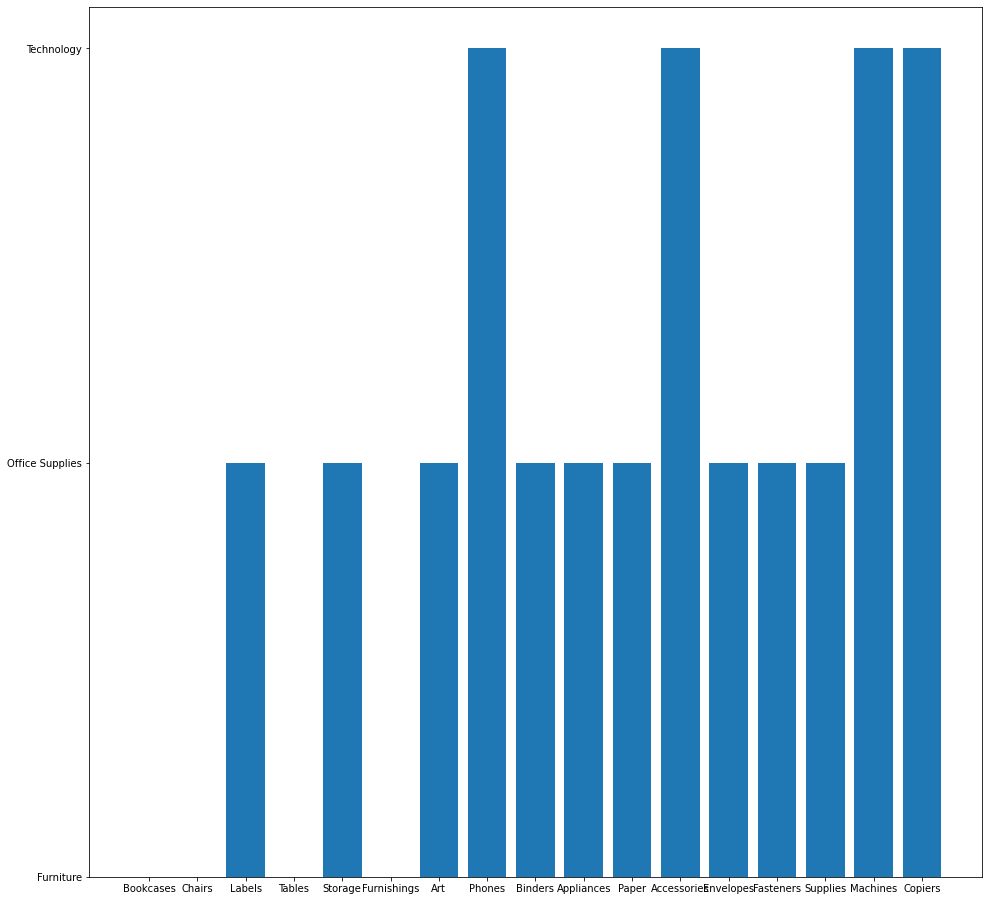

In [15]:


plt.figure(figsize=(16,16))
plt.bar('Sub-Category','Category', data=df)
plt.show()



California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 42
Nevada        

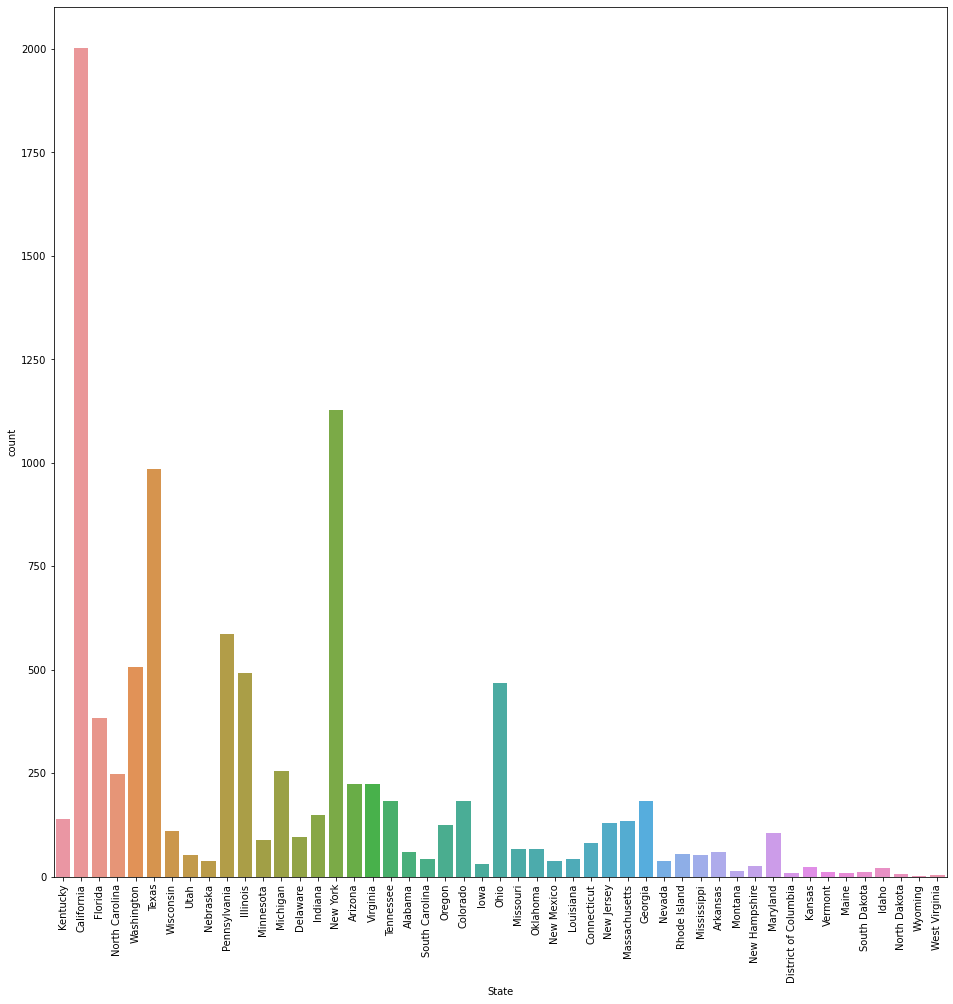

In [25]:
print(df['State'].value_counts())
plt.figure(figsize=(16,16))
sns.countplot(x=df['State'])
plt.xticks(rotation=90)
plt.show()


Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


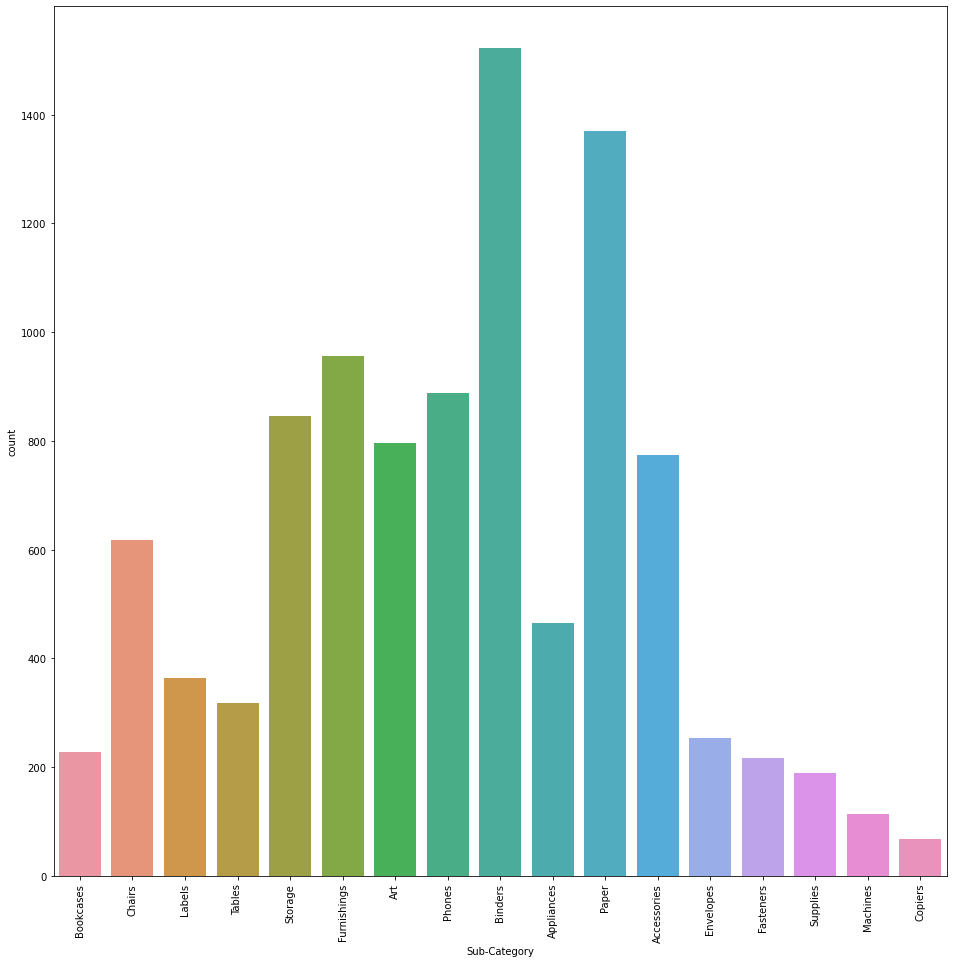

In [27]:
print(df['Sub-Category'].value_counts())
plt.figure(figsize=(16,16))
sns.countplot(x=df['Sub-Category'])
plt.xticks(rotation=90)
plt.show()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 42
Nevada        

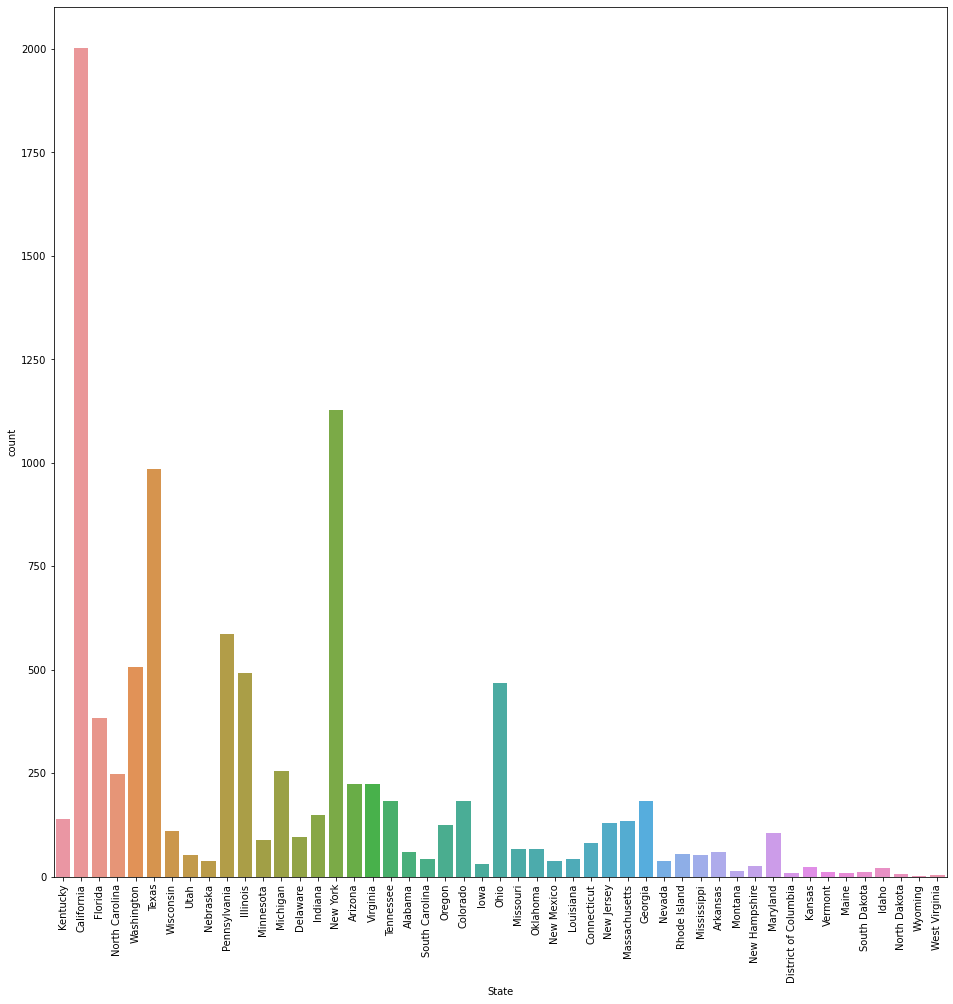

In [26]:
print(df['State'].value_counts())
plt.figure(figsize=(16,16))
sns.countplot(x=df['State'])
plt.xticks(rotation=90)
plt.show()

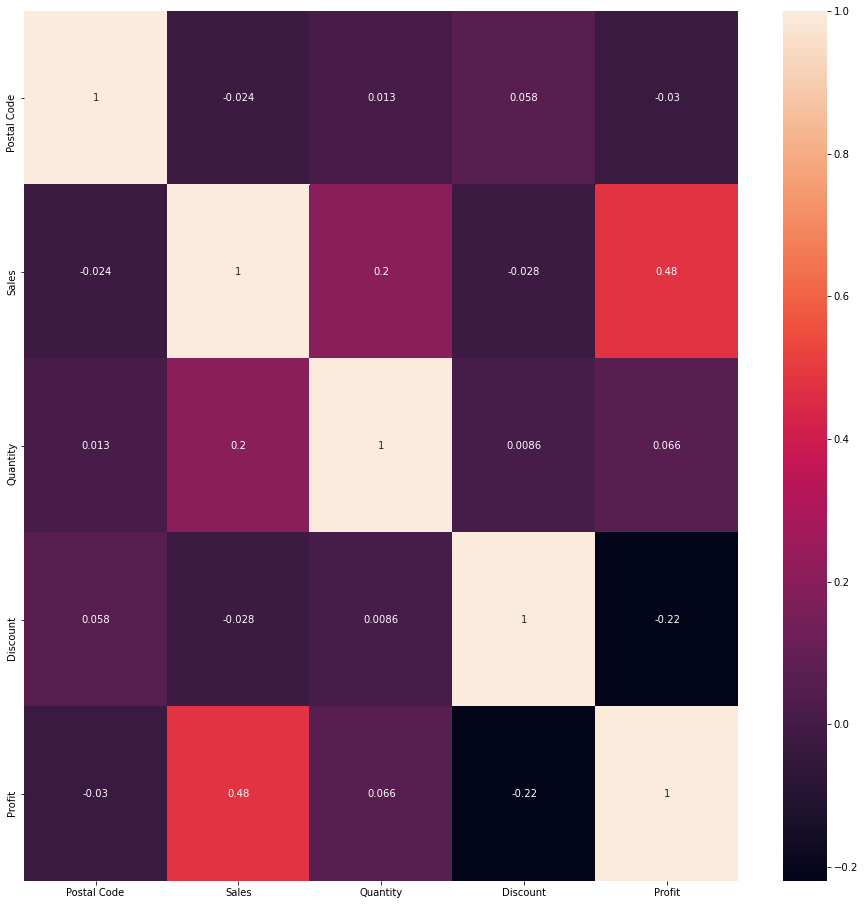

In [30]:


fig,axes = plt.subplots(1,1,figsize=(16,16))
sns.heatmap(df.corr(), annot= True)
plt.show()



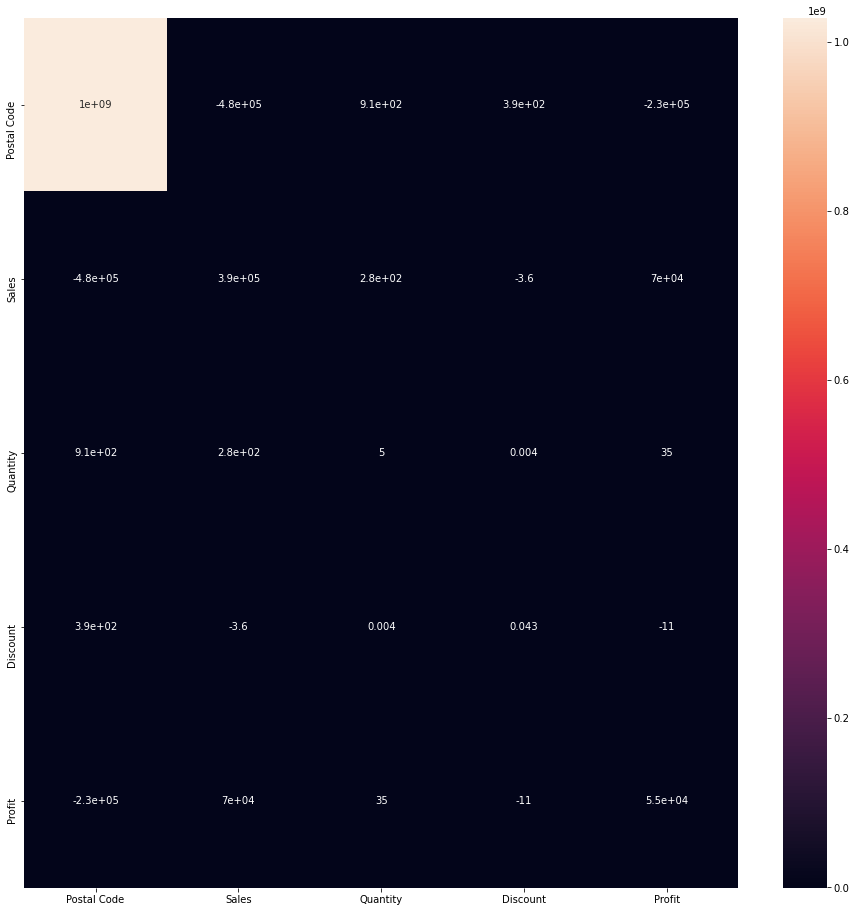

In [31]:
fig,axes = plt.subplots(1,1,figsize=(16,16))
sns.heatmap(df.cov(), annot= True)
plt.show()


/home/vipin/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/vipin/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/vipin/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/vipi

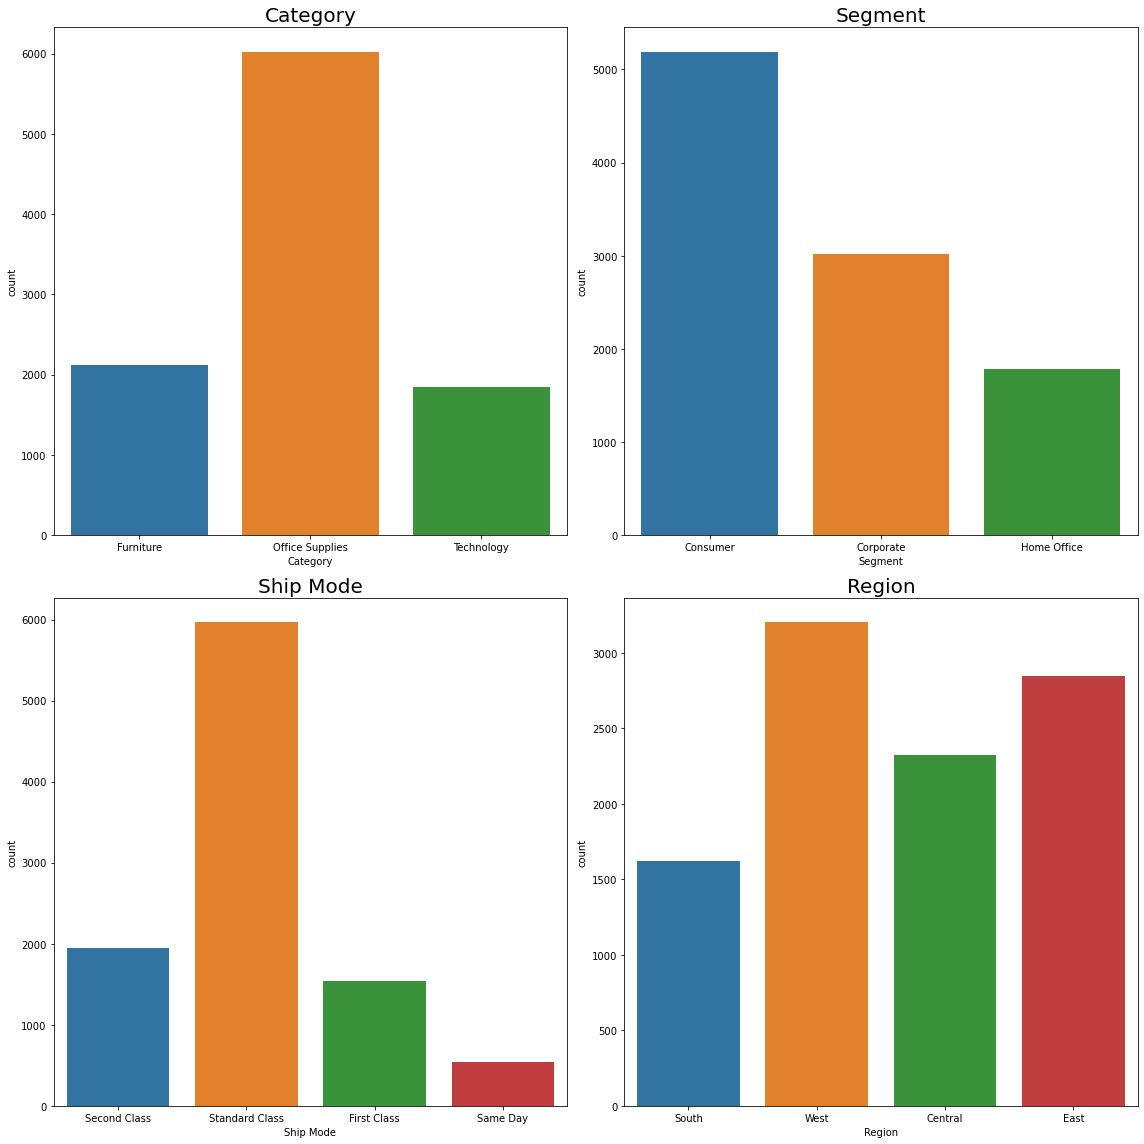

In [36]:
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(16,16));

sns.countplot(df['Category'],ax=axs[0][0])
sns.countplot(df['Segment'],ax=axs[0][1])
sns.countplot(df['Ship Mode'],ax=axs[1][0])
sns.countplot(df['Region'],ax=axs[1][1])
axs[0][0].set_title('Category',fontsize=20)
axs[0][1].set_title('Segment',fontsize=20)
axs[1][0].set_title('Ship Mode',fontsize=20)
axs[1][1].set_title('Region',fontsize=20)


plt.tight_layout()



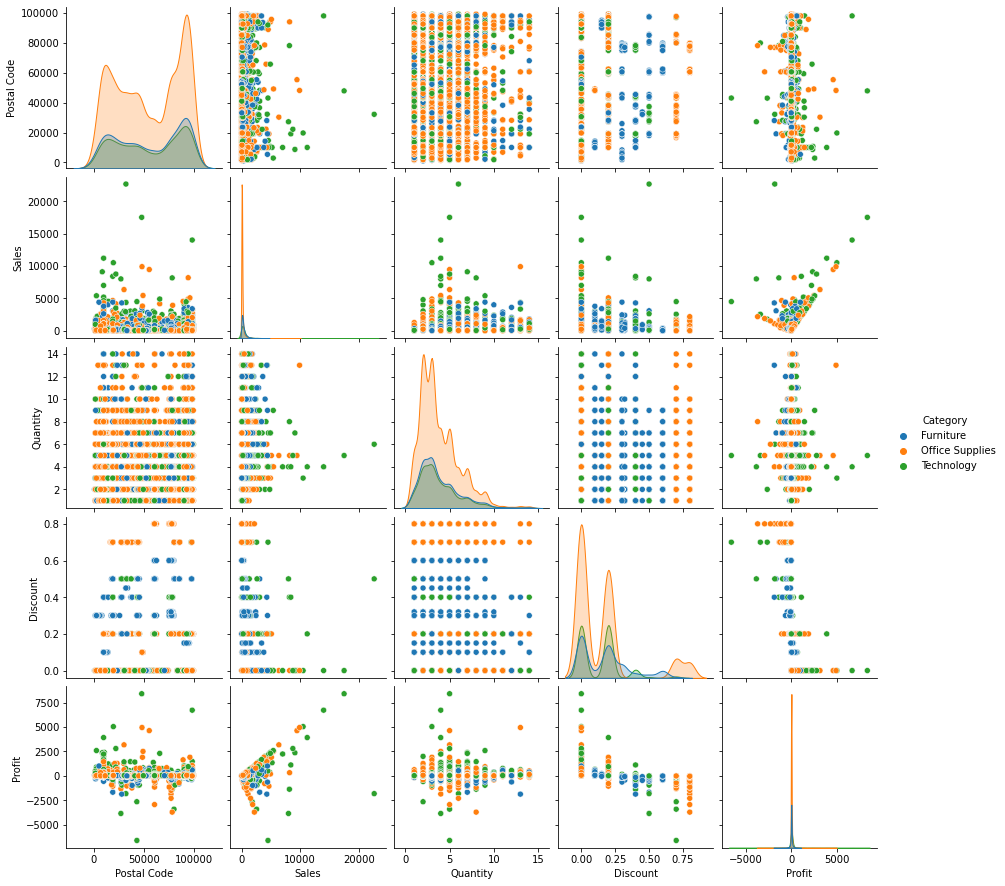

In [33]:


sns.pairplot(df,hue='Category')



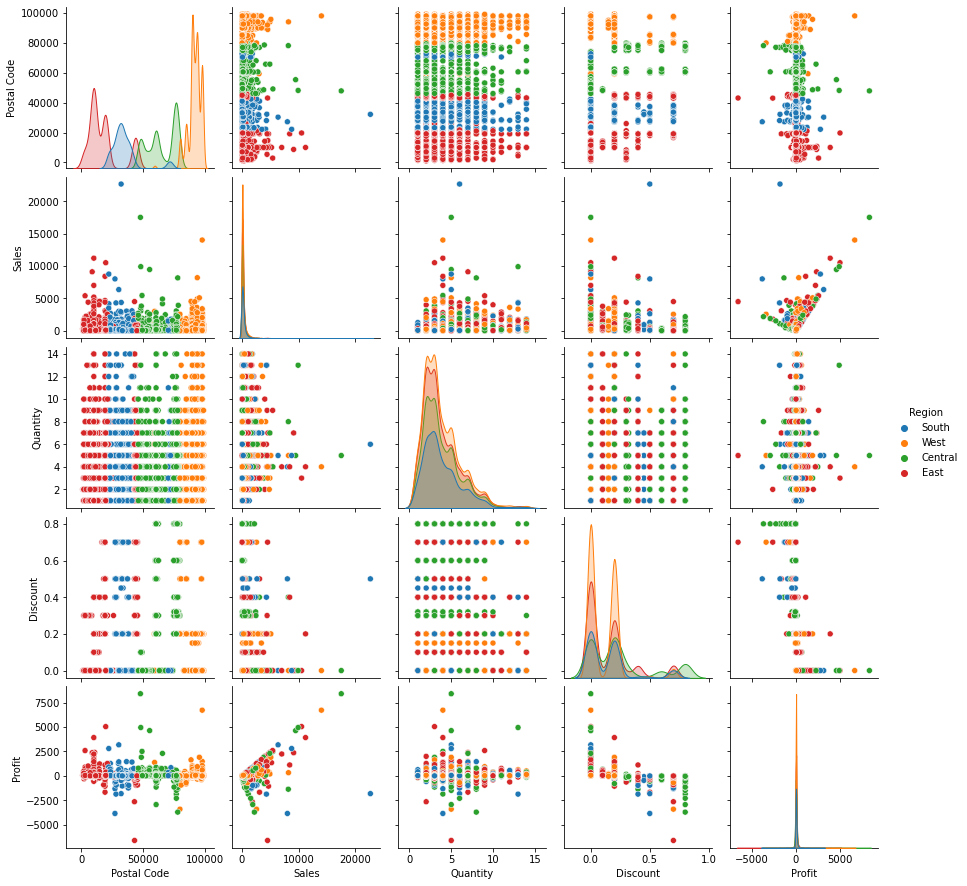

In [34]:
sns.pairplot(df,hue='Region')

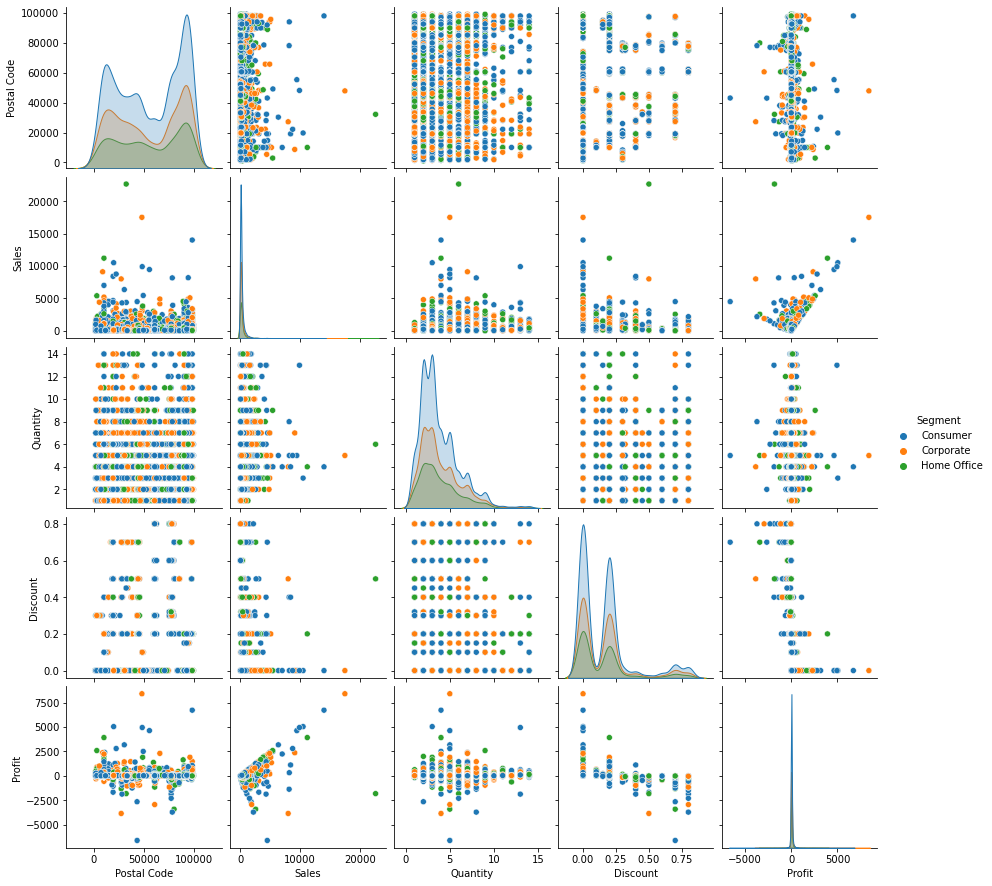

In [35]:
sns.pairplot(df,hue='Segment')


<AxesSubplot:xlabel='Sub-Category', ylabel='Profit'>

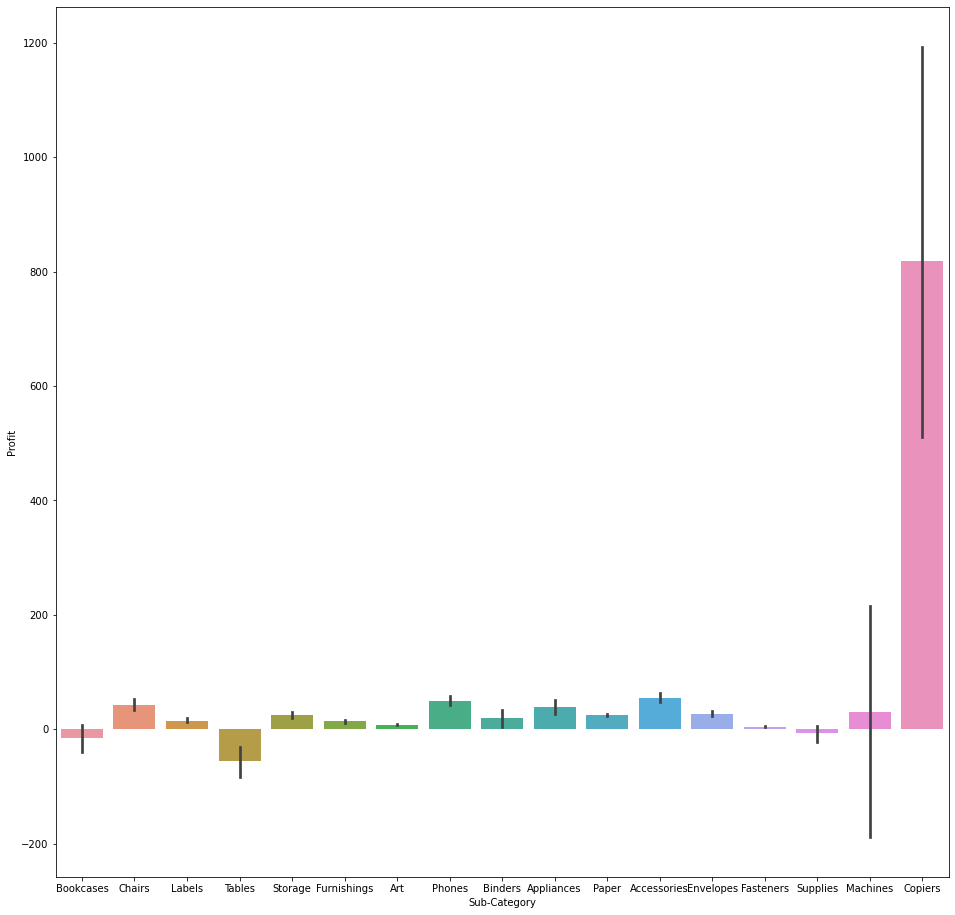

In [38]:
plt.figure(figsize=(16,16))
sns.barplot(x=df['Sub-Category'], y=df['Profit'])

/home/vipin/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


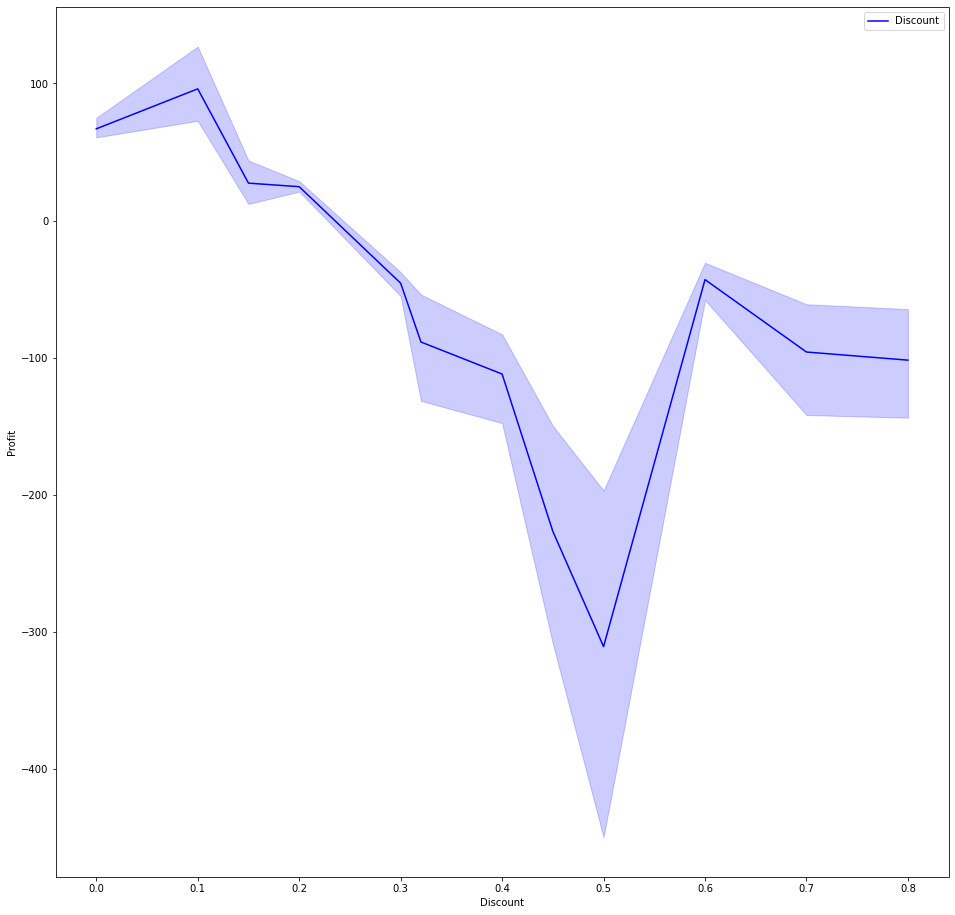

In [40]:
plt.figure(figsize = (16,16))
sns.lineplot('Discount', 'Profit', data = df, color = 'b', label= 'Discount')
plt.legend()


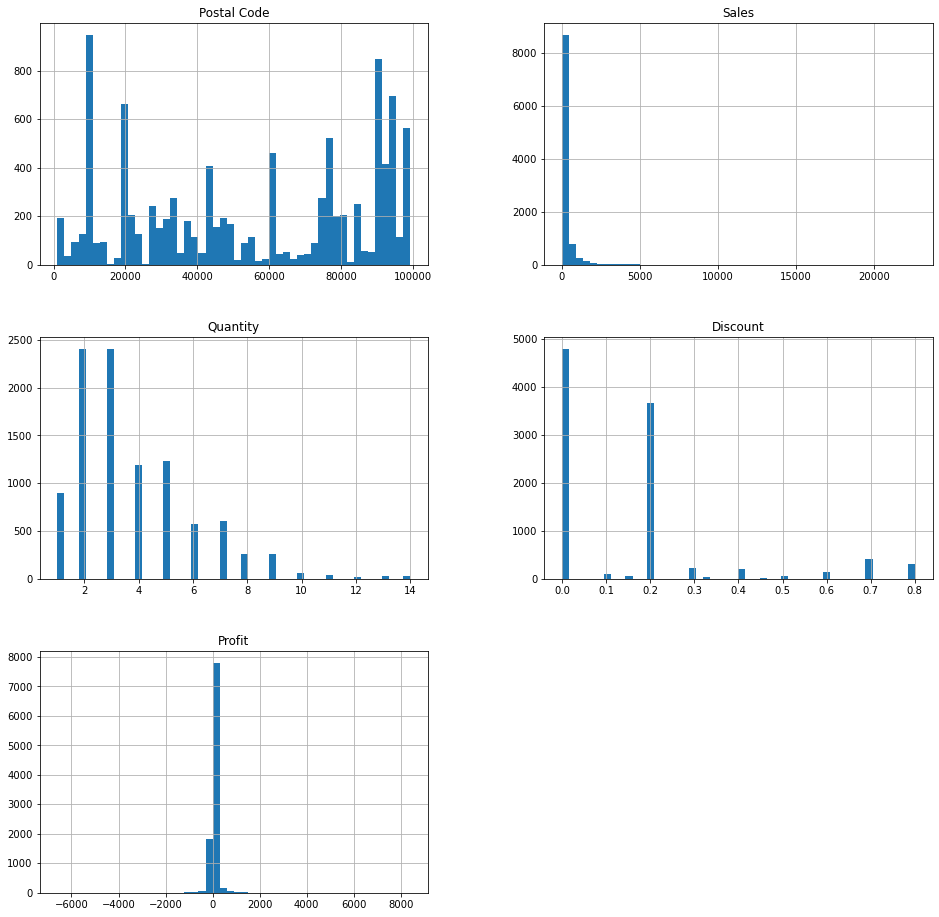

In [42]:


df.hist(bins=50 ,figsize=(16,16))
plt.show()



In [43]:
df.groupby("State").Profit.agg(["sum","mean","min","max","count","median","std","var"])

,sum,mean,min,max,count,median,std,var
State,,,,,,,,
Alabama,5786.8253,94.865989,0.0000,1459.2000,61,16.87500,210.901876,44479.601429
Arizona,-3427.9246,-15.303235,-814.4832,211.4955,224,2.53365,109.266267,11939.117124
Arkansas,4008.6871,66.811452,1.4190,843.1706,60,18.34080,123.249880,15190.532873
California,76381.3871,38.171608,-325.5720,1906.4850,2001,13.30560,97.691593,9543.647400
Colorado,-6527.8579,-35.867351,-3399.9800,247.9960,182,3.12480,276.424024,76410.240842
Connecticut,3511.4918,42.823071,-15.5826,294.6710,82,12.18310,66.138081,4374.245726
Delaware,9977.3748,103.930988,-48.7839,5039.9856,96,19.19700,518.953513,269312.749126
District of Columbia,1059.5893,105.958930,4.4344,648.5624,10,14.52720,213.461353,45565.749398
Florida,-3399.3017,-8.875461,-1811.0784,327.5922,383,2.93400,126.324165,15957.794770


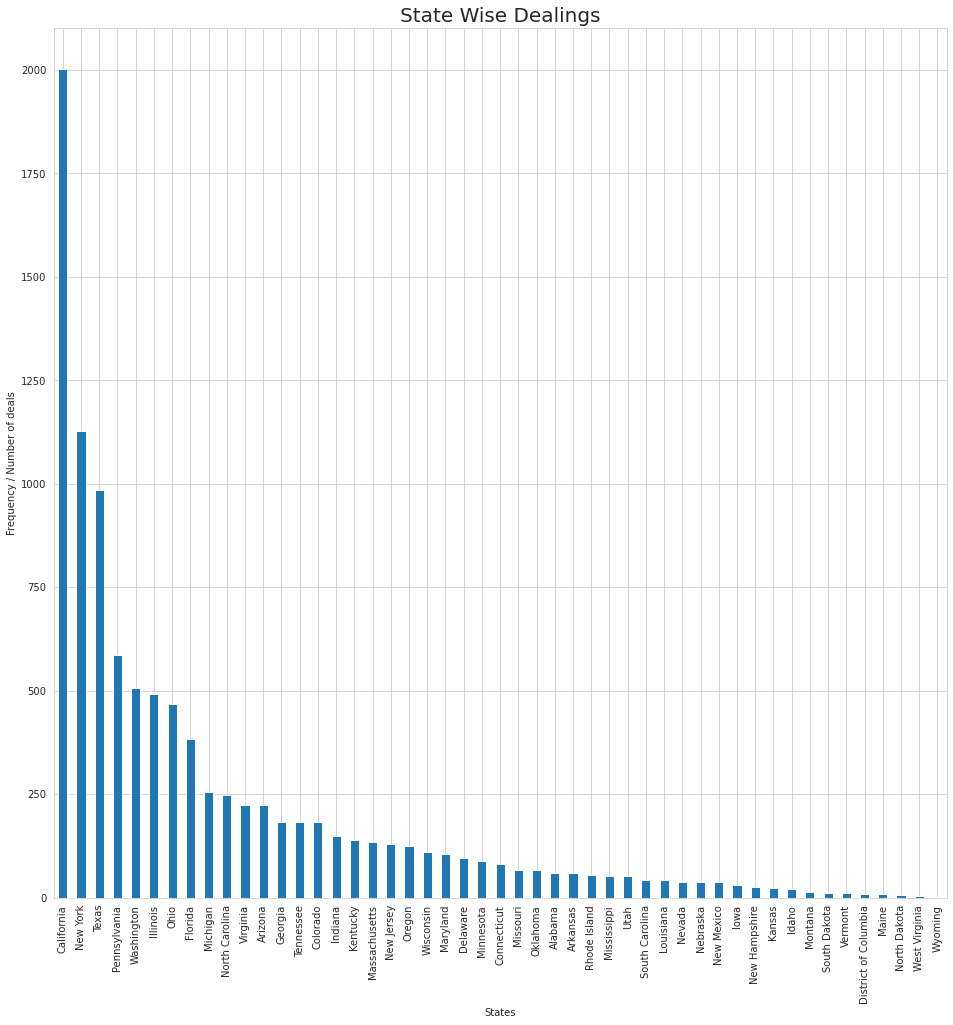

In [54]:
df1 = df['State'].value_counts()
df1.head(10)
df1.plot(kind='bar',figsize=(16,16))
plt.ylabel('Frequency / Number of deals')
plt.xlabel('States')

plt.title('State Wise Dealings', fontsize = 20)
plt.show()

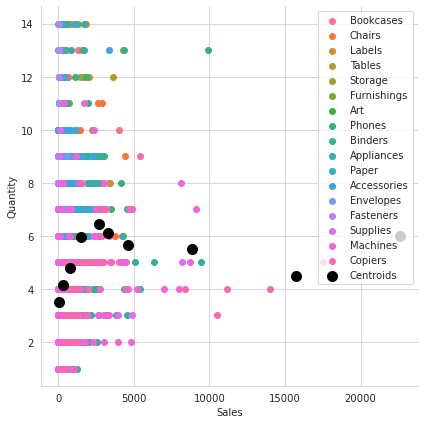

In [47]:
x = df.iloc[:, [9, 10, 11, 12]].values
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0).fit(x)
    wcss.append(kmeans.inertia_)
sns.set_style("whitegrid") 
sns.FacetGrid(df, hue ="Sub-Category",height = 6).map(plt.scatter,'Sales','Quantity')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()

<AxesSubplot:xlabel='Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit'>

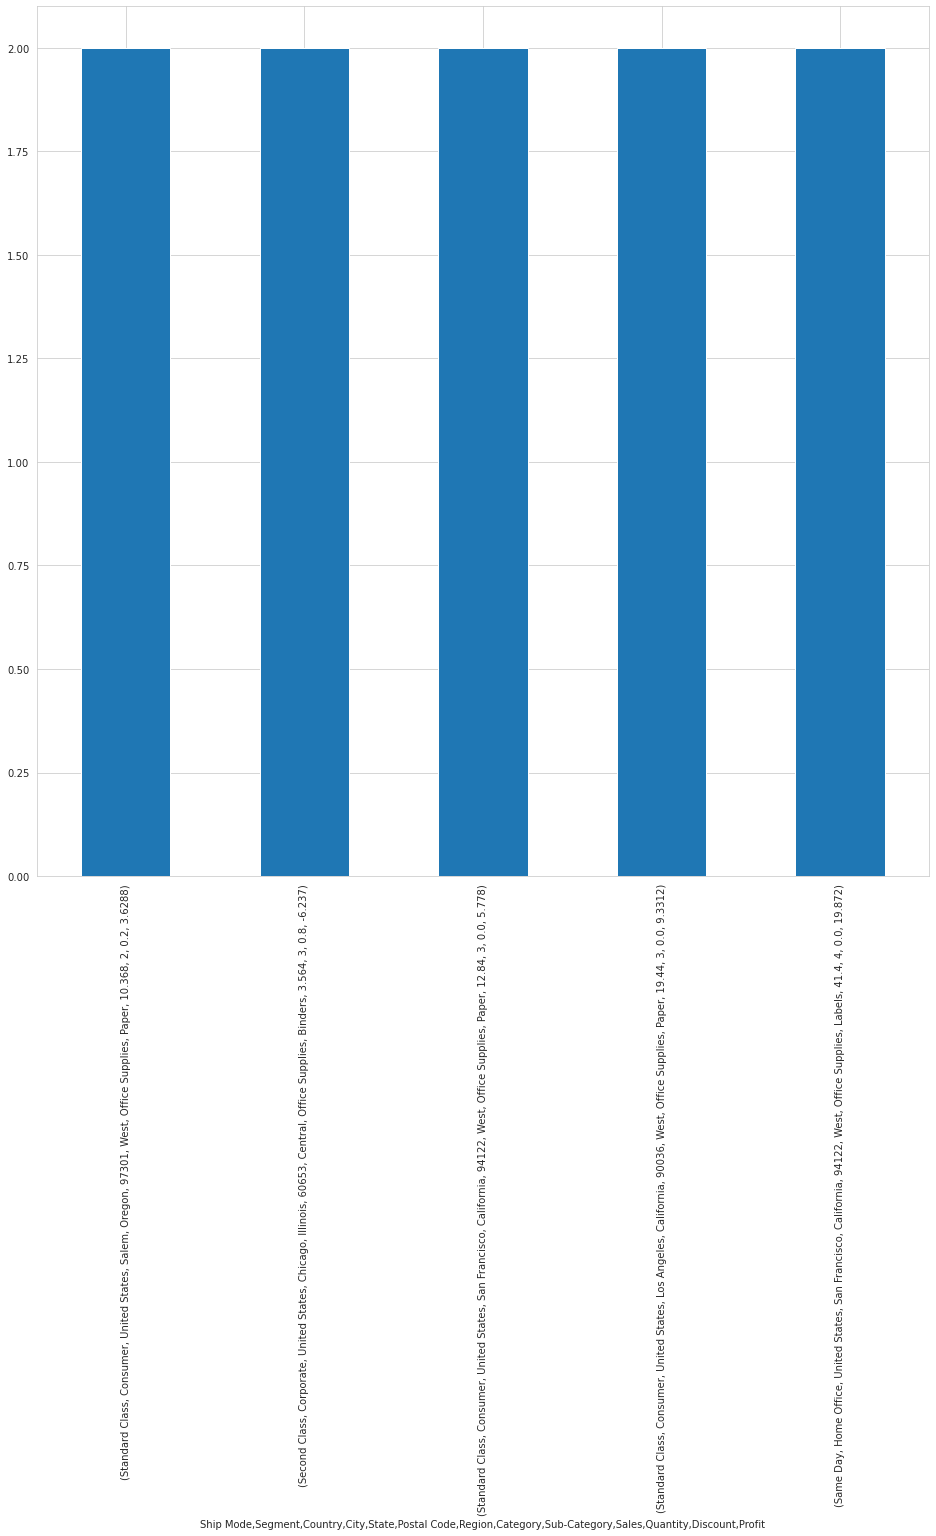

In [48]:


df.value_counts().nlargest().plot(kind = 'bar' , figsize = (16 , 16))



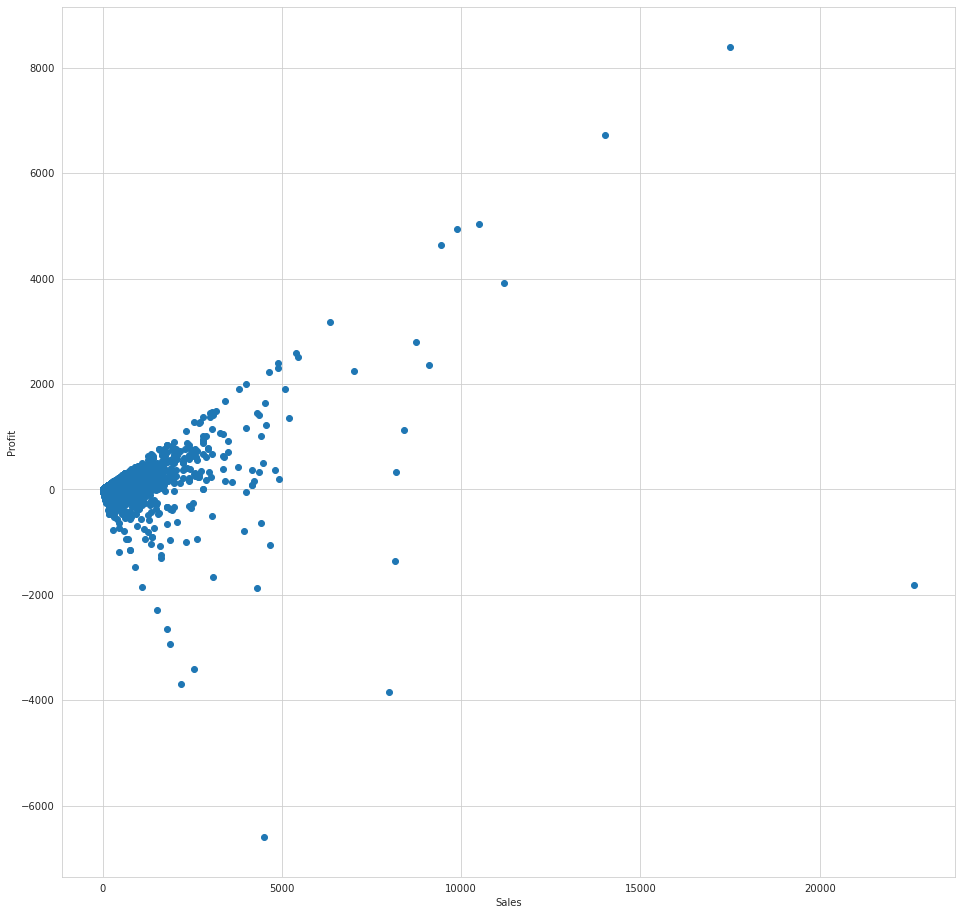

In [50]:


fig, ax = plt.subplots(figsize = (16 , 16))
ax.scatter(df["Sales"] , df["Profit"])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.show()



/home/vipin/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/vipin/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/vipin/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

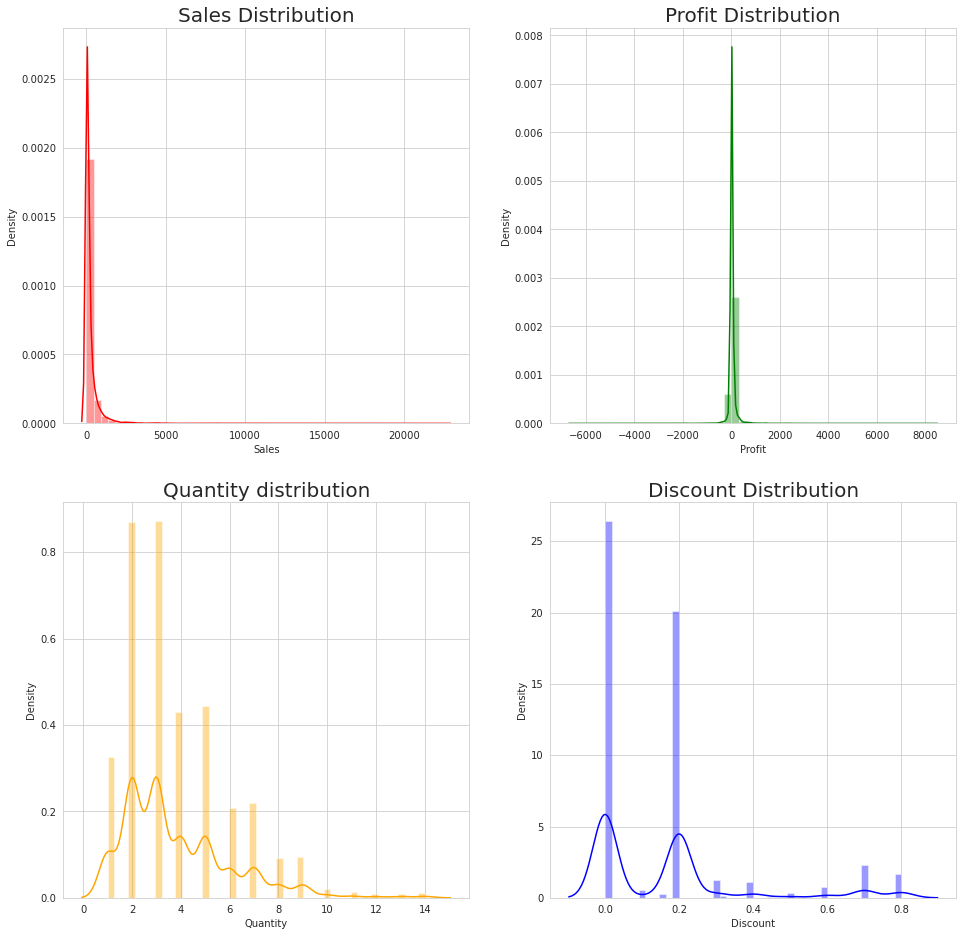

In [51]:
fig, axs = plt.subplots(ncols=2, nrows = 2, figsize = (16,16))
sns.distplot(df['Sales'], color = 'red',  ax = axs[0][0])
sns.distplot(df['Profit'], color = 'green',  ax = axs[0][1])
sns.distplot(df['Quantity'], color = 'orange',  ax = axs[1][0])
sns.distplot(df['Discount'], color = 'blue',  ax = axs[1][1])
axs[0][0].set_title('Sales Distribution', fontsize = 20)
axs[0][1].set_title('Profit Distribution', fontsize = 20)
axs[1][0].set_title('Quantity distribution', fontsize = 20)
axs[1][1].set_title('Discount Distribution', fontsize = 20)
plt.show()
